In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sum
import seaborn as sns

import chart_studio.plotly as py

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df


1. Train our Model on 1st Gropup of Data(Training Data : 1st 80%)

2. We Test Using the Last Part(Test Date : Last 20&)

In [3]:
# Import Our World in Data CSV
owid_df =pd.read_csv('../datasets/owid-covid-data.csv')
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-03-01 to 2020-10-27
Freq: D
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_deaths_per_million  0 non-null      float64
dtypes: float64(1)
memory usage: 3.8 KB


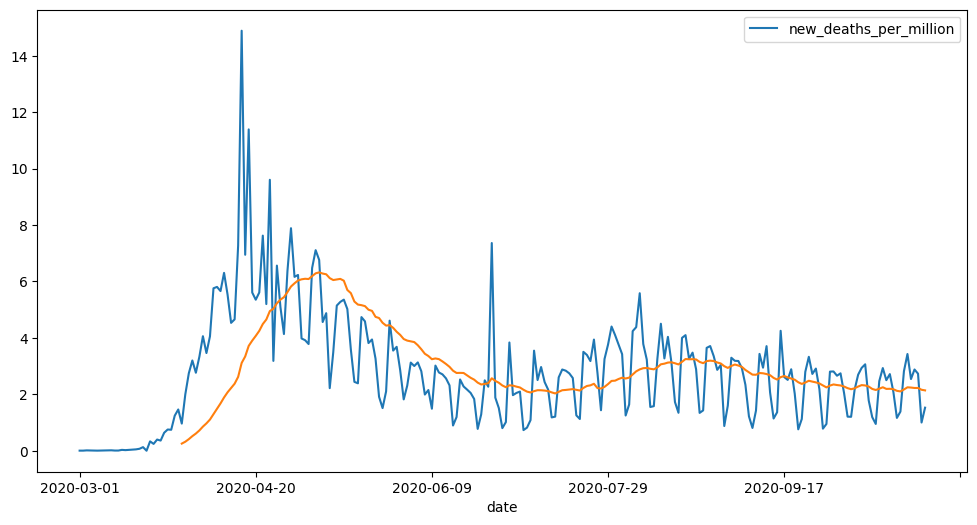

In [17]:
# covid_df = owid_df.location.unique()
# indexer = owid_df[owid_df['location']=='United States'].index
# covid_df =owid_df.loc[indexer, 'date': 'new_deaths_per_million']
# covid_df = covid_df.dropna()
# covid_df.set_index('date', inplace=True)
# covid_df = covid_df.drop(columns=covid_df.columns.difference(['new_deaths_per_million']))
# covid_df.plot(figsize=(12,6))
# covid_df.rolling(window=30).mean()['new_deaths_per_million'].plot()

# covid_df =covid_df.asfreq('d')
# covid_df.info()

# train_df = covid_df.iloc[:192]
# test_df = covid_df.iloc[191:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-03-01 to 2020-10-27
Freq: D
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_deaths_per_million  0 non-null      float64
dtypes: float64(1)
memory usage: 3.8 KB


DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27'],
              dtype='datetime64[ns]', name='date', length=241, freq='D')

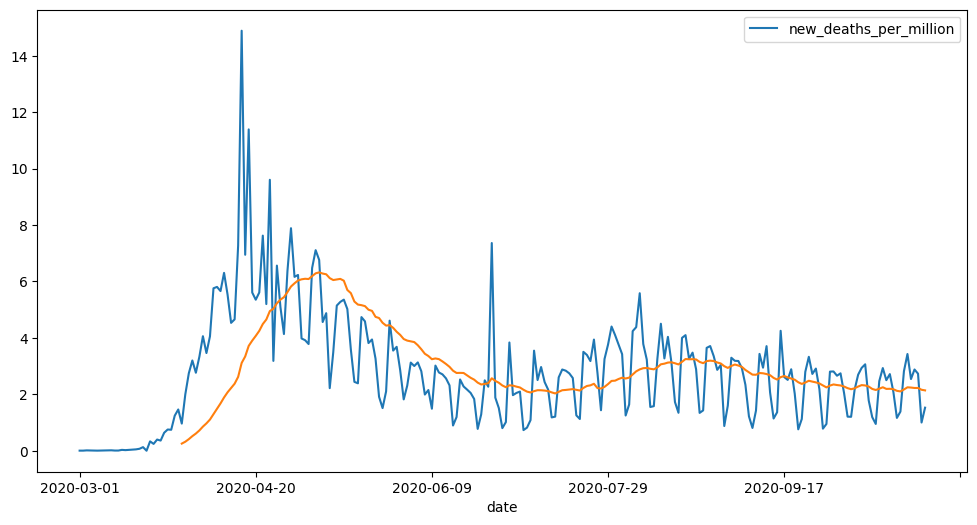

#### Holt-Winters Model with Training Data

In [26]:
# The Holt - Winters Method actually models 3 aspects of the 
# time series being the average, trend and seasonality. 
# In doing so it tries to predict the future provided the 
# series is seasonal and repetitive over time.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# There is no exponential growth so I'll use additive
# I picked 14 for period because it provided the best result
fit_model = ExponentialSmoothing(train_df['new_deaths_per_million'],
                                  trend='add',
                                  seasonal='add',
                                  seasonal_periods=14).fit()
# We can now make predictions 50 days into the future
prediction = fit_model.forecast(50)
prediction

# Plot training, testing and projection data
train_df['new_deaths_per_million'].plot(figsize=(12,6))
test_df['new_deaths_per_million'].plot()
prediction.plot(xlim=['2020-09-09','2020-10-28'])

c:\Users\ADMIN\Documents\GitHub\Python-for-Full-Data-Science\env\Lib\site-packages\statsmodels\tsa\exponential_smoothing\initialization.py:95: RuntimeWarning:

Mean of empty slice



ValueError: shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)

In [21]:
# # The Holt - Winters Method: Average, Trend and Seasonality.
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit_model = ExponentialSmoothing(train_df['new_deaths_per_million'],
#                                  trend='add',
#                                  seasonal='add',
#                                  seasonal_periods=14).fit()

# prediction = fit_model.forecast(50)
# predection

c:\Users\ADMIN\Documents\GitHub\Python-for-Full-Data-Science\env\Lib\site-packages\statsmodels\tsa\exponential_smoothing\initialization.py:95: RuntimeWarning:

Mean of empty slice



ValueError: shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)

#### Evaluating Predictions: Mean Absolute Error

In [22]:
# We'll use the scikit-learn library

from sklearn.metrics import mean_absolute_error, mean_squared_error

def mae(y1, y2, axis=0):
    y1_np = y1.to_numpy()
    y2_np = y2.to_numpy()
    return np.mean(np.abs(y1_np-y2_np), axis=axis)

mae(test_df, prediction, None)

NameError: name 'prediction' is not defined

In [ ]:
mean_absolute_error(test_df, prediction)

#### Mean Squared Error

In [ ]:
def mse(y1, y2, axis=0):
    y1_np = y1.to_numpy()
    y2_np = y2.to_numpy()
    return ((y1_np - y2_np)** 2).mean(axis=axis)

mse(test_df, prediction, None)

In [ ]:
mean_squared_error(test_df, prediction)

#### Root Mean Squared Error

In [ ]:
np.sqrt(mean_squared_error(test_df, prediction))

#### Predict the Future

In [ ]:
covid_model = ExponentialSmoothing(covid_df['new_deaths_per_million'],
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=14).fit()

covid_forecast = covid_model.forecast(100)
covid_df.plot(figsize=(12,6))
covid_forecast.plot()